# Elastic Net Regression Model 

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet,  ElasticNetCV
from sklearn.metrics import mean_absolute_error

In [45]:
df=pd.read_csv('clean_salary_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,simplified_title,seniority,salary_range,min_salary,max_salary,avg_salary,company_age,company_name,state,city,headquarters_state,same_location,size_range,min_size,max_size,avg_size,python,sql,excel,R,deep_learning,PhD,bachelor,masters,power_bi,tableau,prob_solver,critical_thinker
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,data analyst,na,$37-$66,37,66,51.5,60,Vera Institute of Justice,NY,New York,NY,1,201 to 500,201,500,350.5,1,1,0,1,0,0,1,0,0,0,0,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,128,Visiting Nurse Service of New York,NY,New York,NY,1,10000+,10000,30000,20000.0,0,1,1,1,0,0,1,1,0,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,data analyst,senior,$37-$66,37,66,51.5,18,Squarespace,NY,New York,NY,1,1001 to 5000,1001,5000,3000.5,1,1,1,1,0,1,1,0,0,1,0,0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,19,Celerity,NY,New York,VA,0,201 to 500,201,500,350.5,0,1,0,1,0,0,1,0,0,1,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,data analyst,na,$37-$66,37,66,51.5,12,FanDuel,NY,New York,NY,1,501 to 1000,501,1000,750.5,1,1,1,1,0,0,1,0,0,0,0,0


In [46]:
#Picked variables which are slightly more correlated. Let's see if the ridge regression
# can handle this better and give us a more efficient model. 
 

#potential features to analyze based on information from the EDA Notebook 
features=['Rating', 'Type of ownership', 'Sector', 'Revenue', 'simplified_title', 'seniority', 'company_age',
       'state', 'same_location', 'python', 'sql', 'excel',
       'deep_learning', 'PhD', 'bachelor', 'masters', 'power_bi', 'tableau', 'Founded', 'avg_size', 'avg_salary']

#create the data frame needed for the modeling 
df_inter=df[features]

#one hot endode the variables 
df_dummies=pd.get_dummies(df_inter)

#Create the feature matrix, target variable, and train test splits 
X=df_dummies.drop('avg_salary', axis=1)
y=df_dummies.avg_salary

X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
#Elastic Net Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
l1s = np.arange(.01,1, .01)
parameters=tuple(zip(alphas, l1s))
mean_absolute_scores=[]

for (alpha, l1) in parameters: 
    eln=ElasticNet(alpha=alpha, l1_ratio=l1, normalize=True)
    score=np.mean(cross_val_score(eln,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))
    mean_absolute_scores.append(score)
mae=list(np.abs(np.array(mean_absolute_scores)))      

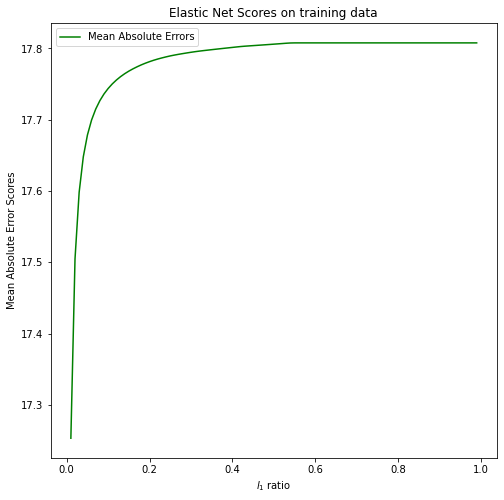

In [56]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae, 'g', label='Mean Absolute Errors')
plt.xlabel('$l_1$ ratio')
plt.ylabel('Mean Absolute Error Scores')
plt.legend()
plt.title("Elastic Net Scores on training data")
plt.show()

In [57]:
#perform the gridsearch on the elastic net 
parameters = {'alpha':np.linspace(.1, 1, 9), 'l1_ratio':np.linspace(.1, 1, 9)}
grid_search = GridSearchCV(ElasticNet(normalize=True),
                      parameters,
                      cv = 5, scoring="neg_mean_absolute_error"
                      )

In [58]:
#train the grid search 
grid_search.fit(X_train, y_train)

#Find the best alpha value 
print("The best alpha value on training data is ", grid_search.best_params_)

The best alpha value on training data is  {'alpha': 0.1, 'l1_ratio': 1.0}


This is essentially telling us what we thought would be true on the training data. The best model version of the elastic net is going to be when we are using the Lasso regression (because the l1_ratio is 1). 

### Check the data on the validation set

In [60]:
#Elastic Net Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
l1s = np.arange(.01,1, .01)
parameters=tuple(zip(alphas, l1s))
mean_absolute_scores_valid=[]

for (alpha, l1) in parameters: 
    eln=ElasticNet(alpha=alpha, l1_ratio=l1, normalize=True)
    eln.fit(X_train, y_train)
    y_eln=eln.predict(X_val)
    score=mean_absolute_error(y_val, y_eln)
    mean_absolute_scores_valid.append(score)
mae_val=list(np.abs(np.array(mean_absolute_scores_valid))) 

In [62]:
eln_dict={'alphas': alphas, 'l1_ratio': l1s, 'MAE': mae_val}
eln_df=pd.DataFrame(eln_dict)
eln_df.loc[eln_df.MAE==min(eln_df.MAE)]
#It looks like the optimal value of alpha that minimizes MAE is going to be 0.01 and the l1_ratio is .01.  

,alphas,l1_ratio,MAE
0,0.01,0.01,17.678243


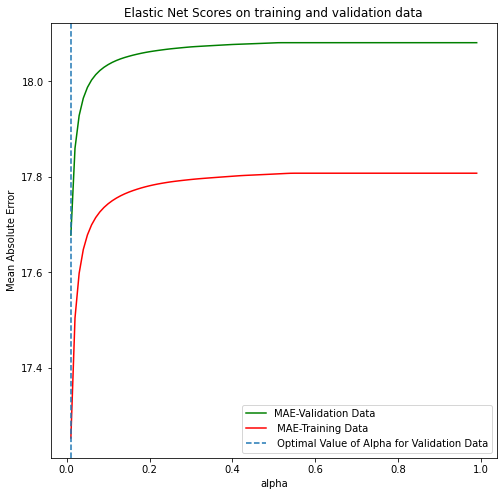

In [65]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae_val, 'g', label='MAE-Validation Data')
plt.plot(np.arange(.01,1, .01), mae, 'r', label=' MAE-Training Data')
plt.axvline(x=0.01, linestyle='--', label=' Optimal Value of Alpha for Validation Data')
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Elastic Net Scores on training and validation data")
plt.show()